## Build ANN





In [1]:
import tensorflow as tf
print(tf.__version__)

2.15.0


In [2]:
#install preprocess package from github
!pip install git+https://github.com/laxmimerit/preprocess_kgptalkie.git

  Cloning https://github.com/laxmimerit/preprocess_kgptalkie.git to /tmp/pip-req-build-e79ivwa0
  Running command git clone --filter=blob:none --quiet https://github.com/laxmimerit/preprocess_kgptalkie.git /tmp/pip-req-build-e79ivwa0
  Resolved https://github.com/laxmimerit/preprocess_kgptalkie.git to commit 96bf02872d9756f29d6cddb8aafaedcd2a39bbb4
  Preparing metadata (setup.py) ... done
  Created wheel for preprocess-kgptalkie: filename=preprocess_kgptalkie-0.1.3-py3-none-any.whl size=7603 sha256=e2c0f07d8dd13ccc5f7f51c906a3d52a33e651a2948cab699c8f8cfd835e2a61
  Stored in directory: /tmp/pip-ephem-wheel-cache-da50vjxr/wheels/5c/94/34/99d5ff65e88b8d9a6c5e8d8652f2311d87790a61a1b7466e21
Successfully built preprocess-kgptalkie


In [3]:
dataset = "https://raw.githubusercontent.com/laxmimerit/NLP-Tutorial-8---Sentiment-Classification-using-SpaCy-for-IMDB-and-Amazon-Review-Dataset/master/datasets/imdb_labelled.txt"


In [4]:
#install spacy
!pip install -U spacy
!python -m spacy download en_core_web_lg

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 587.7/587.7 MB 2.9 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_lg')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [5]:
import pandas as pd
import numpy as np
import spacy

In [6]:
#install packages

import preprocess_kgptalkie as ps
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

### Data Preprocessing

In [7]:
df = pd.read_csv('https://raw.githubusercontent.com/laxmimerit/NLP-Tutorial-8---Sentiment-Classification-using-SpaCy-for-IMDB-and-Amazon-Review-Dataset/master/datasets/imdb_labelled.txt', sep = '\t', header = None)

In [8]:
df.columns = ['reviews', 'sentiment']

In [9]:

df.head()

,reviews,sentiment
0,"A very, very, very slow-moving, aimless movie ...",0
1,Not sure who was more lost - the flat characte...,0
2,Attempting artiness with black & white and cle...,0
3,Very little music or anything to speak of.,0
4,The best scene in the movie was when Gerardo i...,1


In [10]:
def get_clean(x):
    x = str(x).lower()
    x =  ps.cont_exp(x)
    x = ps.remove_emails(x)
    x = ps.remove_html_tags(x)
    x = ps.remove_urls(x)
    x =  ps.remove_special_chars(x)
    x = ps.remove_accented_chars(x)
    return x

In [11]:
x = 'some txt data emm@gmail.com'

In [12]:
get_clean(x)

'some txt data'

In [13]:
#apply the text preprocessing on the dataset

df['reviews'] = df['reviews'].apply(lambda x: get_clean(x))

/usr/local/lib/python3.10/dist-packages/preprocess_kgptalkie/utils.py:97: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  return BeautifulSoup(x, 'lxml').get_text().strip()


In [14]:
df.head()

,reviews,sentiment
0,a very very very slowmoving aimless movie abou...,0
1,not sure who was more lost the flat characters...,0
2,attempting artiness with black white and cleve...,0
3,very little music or anything to speak of,0
4,the best scene in the movie was when gerardo i...,1


### Get the word2vec

```
pip install -U spacy

python -m spacy download en_core_web_lg
```

In [15]:
#import spacy large model

import en_core_web_lg

In [16]:
nlp = en_core_web_lg.load()

/usr/local/lib/python3.10/dist-packages/spacy/util.py:1740: UserWarning: [W111] Jupyter notebook detected: if using `prefer_gpu()` or `require_gpu()`, include it in the same cell right before `spacy.load()` to ensure that the model is loaded on the correct device. More information: http://spacy.io/usage/v3#jupyter-notebook-gpu
  warnings.warn(Warnings.W111)


In [17]:
def get_vec(x):
  doc = nlp(x)
  vec = doc.vector
  return vec

In [18]:
get_vec('hi hello').shape

(300,)

In [19]:
#convert text data into vectors

df['vec'] = df['reviews'].apply(lambda x: get_vec(x))

In [20]:
df.head()

,reviews,sentiment,vec
0,a very very very slowmoving aimless movie abou...,0,"[-1.8999352, 1.6291338, -3.000296, -1.639837, ..."
1,not sure who was more lost the flat characters...,0,"[-3.794328, 0.70210844, -2.5325108, 0.14926393..."
2,attempting artiness with black white and cleve...,0,"[-2.997271, -0.036909185, -2.2903404, -0.76549..."
3,very little music or anything to speak of,0,"[-1.9868913, 2.2468886, -4.532146, -2.550426, ..."
4,the best scene in the movie was when gerardo i...,1,"[-1.0748299, 2.742419, -2.5380828, -1.3163186,..."


In [21]:
y = df['sentiment']

In [22]:
#convert data into a numpy array and reshape it

X = df['vec'].to_numpy()
X = X.reshape(-1, 1)

In [23]:
df.shape, X.shape

((748, 3), (748, 1))

In [24]:
X = np.concatenate(np.concatenate(X, axis = 0), axis = 0).reshape(-1, 300)

In [25]:
df.shape, X.shape

((748, 3), (748, 300))

In [26]:
#split the text data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0, stratify = y)

In [27]:
X_train.shape, X_test.shape

((598, 300), (150, 300))

In [28]:
np.min(X_train)

-11.106075

### Feature Standardization

In [29]:
from sklearn.preprocessing import MinMaxScaler

In [30]:
#bring all the data vector between 0 and 1

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [31]:
np.min(X_train)

0.0

In [32]:
np.max(X_train)

1.0000001

### ANN Model Building and Traning

In [33]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2

In [34]:
#build our model

model = Sequential()
model.add(Dense(units = 128, activation='relu', kernel_regularizer=l2(0.01), input_dim = X.shape[1]))
model.add(Dense(128, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation='sigmoid'))



In [35]:
#compile our model

model.compile(optimizer=Adam(learning_rate = 0.0005), loss = 'binary_crossentropy', metrics=['accuracy'])

In [36]:
model.fit(X_train, y_train, batch_size=4, epochs=20)

Epoch 1/20
150/150 [==============================] - 6s 3ms/step - loss: 1.8218 - accuracy: 0.5134
Epoch 2/20
150/150 [==============================] - 1s 4ms/step - loss: 1.1368 - accuracy: 0.5619
Epoch 3/20
150/150 [==============================] - 1s 5ms/step - loss: 0.8937 - accuracy: 0.5686
Epoch 4/20
150/150 [==============================] - 1s 5ms/step - loss: 0.7741 - accuracy: 0.6120
Epoch 5/20
150/150 [==============================] - 1s 5ms/step - loss: 0.7192 - accuracy: 0.6221
Epoch 6/20
150/150 [==============================] - 1s 4ms/step - loss: 0.6800 - accuracy: 0.6622
Epoch 7/20
150/150 [==============================] - 1s 3ms/step - loss: 0.6576 - accuracy: 0.6639
Epoch 8/20
150/150 [==============================] - 1s 4ms/step - loss: 0.6090 - accuracy: 0.7241
Epoch 9/20
150/150 [==============================] - 1s 3ms/step - loss: 0.6245 - accuracy: 0.6706
Epoch 10/20
150/150 [==============================] - 1s 3ms/step - loss: 0.5860 - accuracy: 0.7274

### Confusion Matrix Plot

In [37]:
!pip install mlxtend

In [38]:
y_pred = (model.predict(X_test) > 0.5).astype("int32")

5/5 [==============================] - 0s 2ms/step


In [39]:
confusion_matrix(y_test, y_pred)

array([[27, 46],
       [ 5, 72]])

In [40]:
from mlxtend.plotting import plot_confusion_matrix

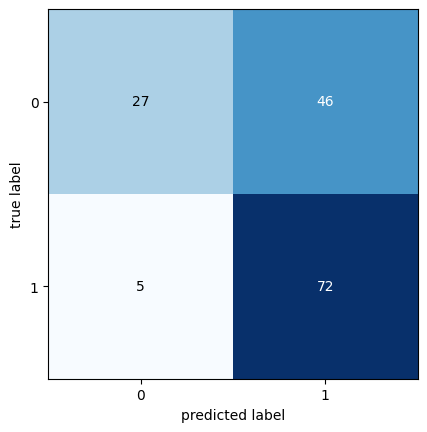

In [41]:
plot_confusion_matrix(confusion_matrix(y_test, y_pred))
plt.show()

In [42]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.37      0.51        73
           1       0.61      0.94      0.74        77

    accuracy                           0.66       150
   macro avg       0.73      0.65      0.63       150
weighted avg       0.72      0.66      0.63       150



### Setting Custom Threshold

In [43]:
from sklearn.metrics import precision_score, recall_score

In [44]:
y_pred = model.predict(X_test)

5/5 [==============================] - 0s 2ms/step


In [45]:
for i in [0.30, 0.35, 0.40, 0.45, 0.50, 0.55, 0.60, 0.65, 0.70, 0.75]:
  classes = [1 if val>i else 0 for val in y_pred]
  print(i, "-->>", precision_score(y_test, classes), recall_score(y_test, classes))

0.3 -->> 0.5648854961832062 0.961038961038961
0.35 -->> 0.5615384615384615 0.948051948051948
0.4 -->> 0.5748031496062992 0.948051948051948
0.45 -->> 0.5950413223140496 0.935064935064935
0.5 -->> 0.6101694915254238 0.935064935064935
0.55 -->> 0.6101694915254238 0.935064935064935
0.6 -->> 0.6206896551724138 0.935064935064935
0.65 -->> 0.6396396396396397 0.922077922077922
0.7 -->> 0.6509433962264151 0.8961038961038961
0.75 -->> 0.6631578947368421 0.8181818181818182


In [46]:
classes = [1 if val>0.6 else 0 for val in y_pred]

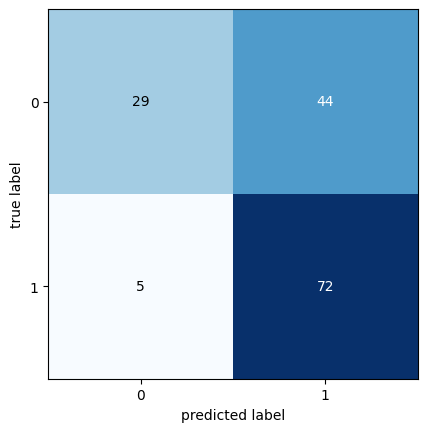

In [47]:
plot_confusion_matrix(confusion_matrix(y_test, classes))
plt.show()

## 1D CNN Model Building and Training

In [48]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense, Conv1D, BatchNormalization, Dropout

In [49]:
#check the shape of x train

X_train.shape

(598, 300)

In [50]:
#reshape your x train and test into 2 dimensional

X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)


In [51]:
X_train.shape, X_test.shape

((598, 300, 1), (150, 300, 1))

In [52]:
model = Sequential()
model.add(Conv1D(32, 2, activation='relu', input_shape = X_train[0].shape))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.3))

model.add(Dense(1, activation='sigmoid'))

In [53]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 299, 32)           96        
                                                                 
 batch_normalization (Batch  (None, 299, 32)           128       
 Normalization)                                                  
                                                                 
 dropout (Dropout)           (None, 299, 32)           0         
                                                                 
 flatten (Flatten)           (None, 9568)              0         
                                                                 
 dense_4 (Dense)             (None, 64)                612416    
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                      

In [54]:
#train the model

epochs = 20
model.compile(optimizer=Adam(0.00001), loss = 'binary_crossentropy', metrics= ['accuracy'])
history = model.fit(X_train, y_train, epochs = epochs, validation_data=(X_test, y_test))

Epoch 1/20
19/19 [==============================] - 6s 35ms/step - loss: 0.7116 - accuracy: 0.5585 - val_loss: 0.6907 - val_accuracy: 0.5467
Epoch 2/20
19/19 [==============================] - 0s 10ms/step - loss: 0.7225 - accuracy: 0.5485 - val_loss: 0.6887 - val_accuracy: 0.5867
Epoch 3/20
19/19 [==============================] - 0s 10ms/step - loss: 0.6563 - accuracy: 0.6137 - val_loss: 0.6869 - val_accuracy: 0.5933
Epoch 4/20
19/19 [==============================] - 0s 12ms/step - loss: 0.6056 - accuracy: 0.6906 - val_loss: 0.6848 - val_accuracy: 0.6133
Epoch 5/20
19/19 [==============================] - 0s 11ms/step - loss: 0.5844 - accuracy: 0.6940 - val_loss: 0.6823 - val_accuracy: 0.6333
Epoch 6/20
19/19 [==============================] - 0s 11ms/step - loss: 0.5800 - accuracy: 0.6957 - val_loss: 0.6799 - val_accuracy: 0.6267
Epoch 7/20
19/19 [==============================] - 0s 12ms/step - loss: 0.5614 - accuracy: 0.7090 - val_loss: 0.6762 - val_accuracy: 0.6533
Epoch 8/20
19

### Plot Learning Curve

In [55]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [56]:
def plot_learningCurve(history, epoch):
  # Plot training & validation accuracy values
  epoch_range = range(1, epoch+1)
  plt.plot(epoch_range, history.history['accuracy'])
  plt.plot(epoch_range, history.history['val_accuracy'])
  plt.title('Model accuracy')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Val'], loc='upper left')
  plt.show()

  # Plot training & validation loss values
  plt.plot(epoch_range, history.history['loss'])
  plt.plot(epoch_range, history.history['val_loss'])
  plt.title('Model loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Val'], loc='upper left')
  plt.show()

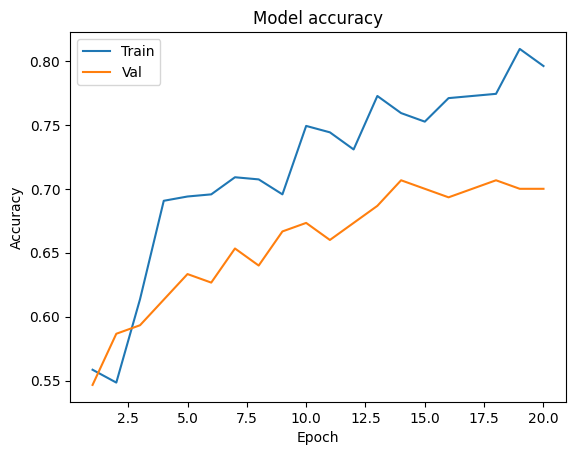

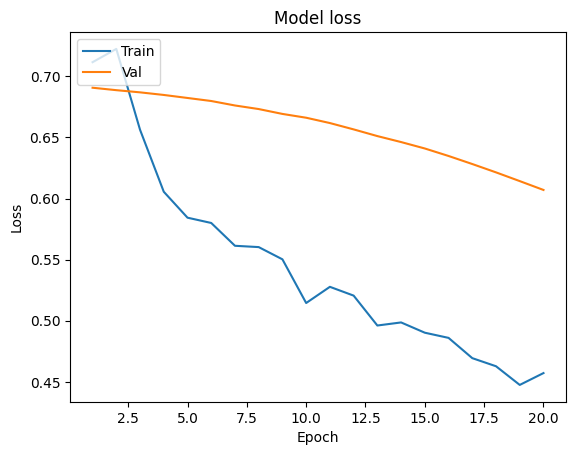

In [57]:
plot_learningCurve(history, epochs)

### Model Load, Store and Testing

5/5 [==============================] - 0s 4ms/step


(<Figure size 640x480 with 1 Axes>,
 <Axes: xlabel='predicted label', ylabel='true label'>)

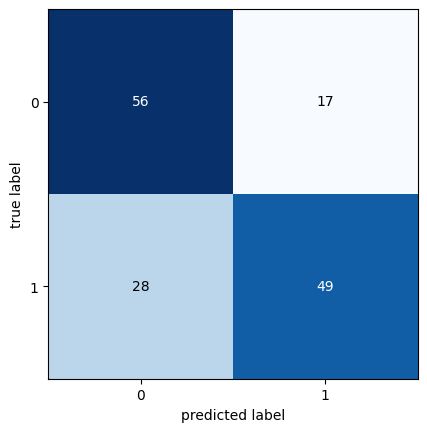

In [60]:
y_pred = (model.predict(X_test) > 0.5).astype("int32")
plot_confusion_matrix(confusion_matrix(y_test, y_pred))


In [61]:
from tensorflow.keras.models import load_model

In [72]:
model.save('cnn', save_format='h5')  #save the model

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [65]:
model = load_model('cnn')  #load the model

In [66]:
X_test[0].shape

(300, 1)

In [69]:
def get_pred(x, model, scaler):
    x = get_clean(x)  # Assuming you have 'get_clean' defined correctly
    vec = get_vec(x).reshape(1, -1)  # Assuming 'get_vec' outputs proper shape
    vec = scaler.transform(vec)
    vec = vec.reshape(1, 300, 1)  # Enforcing the shape your model expects

    # Corrected prediction logic
    y_pred = (model.predict(vec) > 0.5).astype("int32")

    return y_pred[0][0]  # Return the single predicted class label


In [70]:
x = 'it was a nice movie. thanks for making it'
get_pred(x, model, scaler)

1/1 [==============================] - 0s 109ms/step


1

In [71]:
# [1, 2, 3] #(,3)
# [[1, 2, 3]] #(1,3)